In [6]:
#import nltk
#nltk.download()

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import gensim
import gensim.downloader as api
import pandas as pd
from corus import load_wiki
from gensim import corpora
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from gensim.test.utils import get_tmpfile
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial

In [8]:
def create_dataframe(matrix, tokens_row, tokens_col):

    #doc_names = [f'doc_{i}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=tokens_row, columns=tokens_col)
    return(df)

In [86]:
def create_cos_matrix(model_doc2vec, df_row, df_col):
    a = np.empty(shape=(len(df_row), len(df_col)), dtype=float)
    for i, row in enumerate(df_row):
        for j, col in enumerate(df_col):
            a[i][j] = 1 - spatial.distance.cosine(model_doc2vec.infer_vector(row.split()), model_doc2vec.infer_vector(col.split()))
            #a[i][j] = cosine_similarity([model_doc2vec.infer_vector(row.split())], [model_doc2vec.infer_vector(col.split())])[0][0]
            #print(i, j, cosine_similarity([model_doc2vec.infer_vector(row)], [model_doc2vec.infer_vector(col)])[0][0])
            #print(type(row), type(col))
            #print(cosine_similarity([model_doc2vec.infer_vector(row)], [model_doc2vec.infer_vector(col)]))
    return a

In [93]:
def create_df_disc_vac(model_doc2vec, df_disc_doc, df_vac_doc):
    df = pd.DataFrame(columns=['disc', 'vacancy_id', 'speciality', 'cos_simularity'])
    for disc_name, disc_doc in df_disc_doc:
        for vac_id, vac_spec in df_vac_doc:
            values_to_add = {'disc': disc_name, 'vacancy_id': vac_id, 'speciality': vac_spec, 'cos_simularity': 1 - spatial.distance.cosine(model_doc2vec.infer_vector(disc_doc.split()), model_doc2vec.infer_vector(vac_spec.split()))}
            row_to_add = pd.Series(values_to_add)
            df = df.append(row_to_add)
    return df

In [10]:
# . Еще можно засунуть вообще все слова из описания вакансии

#cosine_similarity([model.infer_vector(df_oop['key_words'].values[1])], [model.infer_vector(df_oop['key_words'].values[0])])

In [11]:
# описание вакансий Формируем vocabulary на основе key_word из вакансий data = [TaggedDocument([list], 'vocabulary')]/
path_rus_corpus = r'RPD_output\dataset_res_desc_vac_lemm.xlsx'
df_path_rus_corpus = pd.read_excel(path_rus_corpus, usecols=[1,5])
df_oop = pd.read_excel(r'RPD_output\dataset_res2.xlsx', usecols=[1, 3, 4, 5])

#df_oop['key_words']=df_oop['key_words'].apply(literal_eval)
#df_oop['key_words'].values[1]

In [12]:
path_rus_corpus_list = df_path_rus_corpus['Lemm_vac'].tolist()

In [13]:
path_rus_corpus_list_clear = []
for document in path_rus_corpus_list:
    try:
        path_rus_corpus_list_clear.append(document.split())
    except:
        pass

In [14]:
oop_list_from_doc = []
for document in df_oop['Doc'].tolist():
    try:
        oop_list_from_doc.append(document.split())
    except:
        pass

In [16]:
path_rus_corpus_list_clear.extend(oop_list_from_doc)

In [17]:
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(path_rus_corpus_list_clear)]
#data = [TaggedDocument(path_rus_corpus_list, 'vocabulary')]

In [20]:
'''# Create the tagged document needed for Doc2Vec
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])'''

'# Create the tagged document needed for Doc2Vec\ndef create_tagged_document(list_of_list_of_words):\n    for i, list_of_words in enumerate(list_of_list_of_words):\n        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])'

In [21]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
train_data = tagged_data 

In [23]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=20, min_count=2, epochs=50)
'''dm=0,'''


2023-12-19 16:34:09,506 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d20,n5,w5,mc2,s0.001,t3>', 'datetime': '2023-12-19T16:34:09.506023', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'created'}


'dm=0,'

In [24]:
model.build_vocab(train_data)

2023-12-19 16:34:11,950 : INFO : collecting all words and their counts
2023-12-19 16:34:11,951 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2023-12-19 16:34:12,378 : INFO : collected 40362 word types and 9109 unique tags from a corpus of 9109 examples and 1629560 words
2023-12-19 16:34:12,378 : INFO : Creating a fresh vocabulary
2023-12-19 16:34:12,441 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 22594 unique words (55.98% of original 40362, drops 17768)', 'datetime': '2023-12-19T16:34:12.441927', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}
2023-12-19 16:34:12,441 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 1611792 word corpus (98.91% of original 1629560, drops 17768)', 'datetime': '2023-12-19T16:34:12.441927', 'gensim': '4.3.0', 'python': '3.1

In [25]:
# Train the Doc2Vec model
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

2023-12-19 16:34:22,327 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 22594 vocabulary and 20 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-12-19T16:34:22.327836', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'train'}
2023-12-19 16:34:23,333 : INFO : EPOCH 0 - PROGRESS: at 95.83% examples, 1405250 words/s, in_qsize 6, out_qsize 0
2023-12-19 16:34:23,382 : INFO : EPOCH 0: training on 1629560 raw words (1491790 effective words) took 1.1s, 1417052 effective words/s
2023-12-19 16:34:24,384 : INFO : EPOCH 1 - PROGRESS: at 99.45% examples, 1473572 words/s, in_qsize 2, out_qsize 1
2023-12-19 16:34:24,386 : INFO : EPOCH 1: training on 1629560 raw words (1491875 effective words) took 1.0s, 1488796 effective words/s
2023-12-19 16:34:25,390 : INFO : EPOCH 2 - PROGRESS: at 99.36% exampl

In [26]:
vector_1 = model.infer_vector(['Второе', 'предложение'])
vector_2 = model.infer_vector(['Второе', 'предложение'])

In [27]:
cosine_similarity([vector_1], [vector_2])

array([[0.9858645]], dtype=float32)

In [28]:
string_1 = 'основной вид учебный деятельность раздел дисциплина формировать вид учебный деятельность объем результат время ч обучение дисциплина раздел основа тестирование рд рд лекция тестирование оценка качество лабораторный занятие по самостоятельный работа раздел формирование рдз лекция реализация стратегия лабораторный занятие тестирование по самостоятельный работа содержание раздел дисциплина раздел основа тестирование тестирование оценка качество по рамка раздел рассматриваться общий теоретический основа процесс тестирование программный обеспечение число механизм выявление формирование оценка качество требование стратегия вид тестирование тема лекция тестирование по ретроспектива основа требование выявление анализ документирование проверка вид стратегия тестирование тема практический занятие отчет дефект гостр исо мэк требование оценка качество система программный обеспечение гостр исолмэк требование оценка качество система программный обеспечение элемент показатель качество управление проект планирование отчетность название лабораторный работа требование выявление оценка качество документирование раздел формирование реализация стратегия тестирование по раздел формировать навык разработка реализация стратегия тестирование рассматриваться специализированный вид тестирование автоматизированный регрессионный тестирование удобство использование тема лекция автоматизация тестирование регрессионный тестирование нефункциональный тестирование тестирование удобство использование название лабораторный работа модульный тестирование регрессионный тестирование тема практический занятие неформальный проверка код оценка качество документированность код'
string_2 = 'основной вид учебный деятельность формировать раздел дисциплина результат вид учебный деятельность ева обучение время ч дисциплина } лекция раздел основа работа растровый d- ¥ рд-1 лабораторный занятие 16 графика дизайн самостоятельный работа лекция раздел основа работа векторный d- ¥ рд-1 лабораторный занятие 16 графика дизайн самостоятельный работа содержание раздел дисциплина раздел основа работа растровый графика дизайн введение изучение растровый графика цветовой модель формат файл тема лекция введение растровый векторный график формат графический файл работа цвет компьютерный график основной определение параметр цвет работа цвет компьютерный графика цветовой модель текст растровый программа название лабораторный работа кадрирование перспектива выравнивание горизонт работа искажение цветокоррекция перевод ч б работа слой маска слой простой коллаж работа корректировать слой цветокоррекция помощь корректировать слой сложный коллаж кисть паттерн работа текст анимация создание макет сайт © чи \ o раздел основа работа векторный графика дизайн введение изучение векторный графика верстка документ подготовка файл печать тема лекция основа разметка верстка документ особенность разработка набор печатный продукция допечатный подготовка файл название лабораторный работа панель инструмент примитив простой операция кривая безье кривой безье инструмент форма узор примитив кривой безье работа текст настройка искривление так далее работа слой направлять сетка выделение контур заливка'
list_1 = string_1.split()
list_2 = string_2.split()
vector_1 = model.infer_vector(list_1)
vector_2 = model.infer_vector(list_2)

In [29]:
cosine_similarity([vector_1], [vector_2])[0][0]

0.62612474

In [30]:
from scipy import spatial

result = 1 - spatial.distance.cosine(vector_1, vector_2)
result

0.6261247396469116

In [33]:
model.wv.similar_by_word('философия',topn=10)

[('смысл', 0.813523530960083),
 ('движущий', 0.7966892123222351),
 ('фокус', 0.7920944094657898),
 ('дух', 0.7679541707038879),
 ('иерархия', 0.7667713761329651),
 ('доверительный', 0.7317387461662292),
 ('saas-платформа', 0.7304755449295044),
 ('проявление', 0.7261020541191101),
 ('доверие', 0.7231811881065369),
 ('самоуправление', 0.7212854623794556)]

In [34]:
model.save("doc2vec_model_vac.model")

2023-12-19 16:36:02,710 : INFO : Doc2Vec lifecycle event {'fname_or_handle': 'doc2vec_model_vac.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-12-19T16:36:02.710383', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'saving'}
2023-12-19 16:36:02,711 : INFO : not storing attribute cum_table
2023-12-19 16:36:02,726 : INFO : saved doc2vec_model_vac.model


In [316]:
#cosine_similarity([model.infer_vector(df_oop['key_words'].values[0])], [model.infer_vector(df_oop['key_words'].values[0])])

array([[0.9854512]], dtype=float32)

In [87]:
res_array = create_cos_matrix(model, df_oop['Doc'], df_oop['Doc'])
dataframe_doc2vec_oop = create_dataframe(res_array, df_oop['title'].tolist(), df_oop['title'].tolist())

In [88]:
dataframe_doc2vec_oop_heat = dataframe_doc2vec_oop.iloc[0:47,47:113]

In [89]:
dataframe_doc2vec_oop_heat

,Анализ данных в бизнес-аналитике,Анализ заинтересованных сторон _* Stakeholder Analysis,Аналитика цепей поставок,Архитектура предприятия,Аудит,Базы данных,Безопасность жизнедеятельности,Бизнес в глобальном контексте _* Business in Global Context,Введение в профессиональную деятельность,Деловые коммуникации,...,Финансовые вычисления,Финансовый менеджмент,Финансовый учет и отчетность,Ценообразование,Эконометрика,Экономика отраслевых рынков,Экономическая социология,Экономическая статистика,Экономический анализ,Элективные дисциплины по физической культуре и спорту
Тестирование информационных систем,0.774388,0.610668,0.481455,0.650819,0.556155,0.506603,0.688478,0.537882,0.713577,0.499082,...,0.436744,0.525007,0.401618,0.542439,0.805824,0.545065,0.457790,0.458147,0.598118,0.691590
Информационные технологии в цифровой среде,0.744217,0.525418,0.358990,0.523718,0.396677,0.573497,0.569362,0.429325,0.418416,0.567866,...,0.371950,0.518906,0.411421,0.627434,0.565274,0.443726,0.431274,0.606512,0.581362,0.410117
Инструментальные средства информационных систем,0.559363,0.550766,0.534806,0.744848,0.667748,0.785236,0.592483,0.457454,0.434604,0.559451,...,0.318514,0.517474,0.485569,0.686232,0.466158,0.567634,0.514311,0.584715,0.568910,0.142664
Корпоративные информационные системы и разработка бизнес-приложений,0.711201,0.653596,0.541973,0.868736,0.603624,0.776691,0.697998,0.599944,0.533530,0.564344,...,0.289012,0.652196,0.462032,0.636869,0.638181,0.571635,0.566239,0.683276,0.542001,0.369566
Методы и средства разработки информационных систем,0.750026,0.547049,0.618386,0.763107,0.576490,0.773261,0.681940,0.442731,0.610669,0.574184,...,0.442676,0.557213,0.517410,0.670565,0.712596,0.657150,0.558568,0.442896,0.512478,0.487239
Анализ данных в управлении предприятием,0.754075,0.577131,0.568789,0.661956,0.408095,0.552616,0.685978,0.442703,0.490453,0.304886,...,0.501459,0.593665,0.431442,0.537739,0.769286,0.538375,0.475255,0.556201,0.556666,0.525542
Проектирование и разработка информационных систем,0.701152,0.526011,0.551520,0.753806,0.580099,0.886262,0.724131,0.385294,0.427669,0.562492,...,0.494813,0.546975,0.482862,0.626021,0.697255,0.607199,0.540872,0.516789,0.499221,0.410333
Разработка Web-приложений,0.696039,0.641481,0.367295,0.683435,0.427884,0.671228,0.708160,0.520914,0.413175,0.582360,...,0.275130,0.523301,0.296394,0.557784,0.613425,0.501053,0.488832,0.539237,0.502635,0.445668
Машинное обучение,0.778253,0.614471,0.475831,0.600215,0.455764,0.635329,0.608950,0.565280,0.570509,0.511906,...,0.387073,0.610723,0.342410,0.620596,0.667021,0.595660,0.512906,0.613753,0.403465,0.545237
Интеллектуальные системы и технологии,0.823246,0.599279,0.520635,0.753149,0.498416,0.744799,0.731435,0.464162,0.523175,0.564879,...,0.403865,0.645706,0.496298,0.686031,0.711381,0.513653,0.498352,0.660083,0.640900,0.498210


In [90]:
cosine_similarity([model.infer_vector(df_oop['Doc'][2].split())], [model.infer_vector(df_oop['Doc'][111].split())])[0][0]

0.15220547

<Axes: >

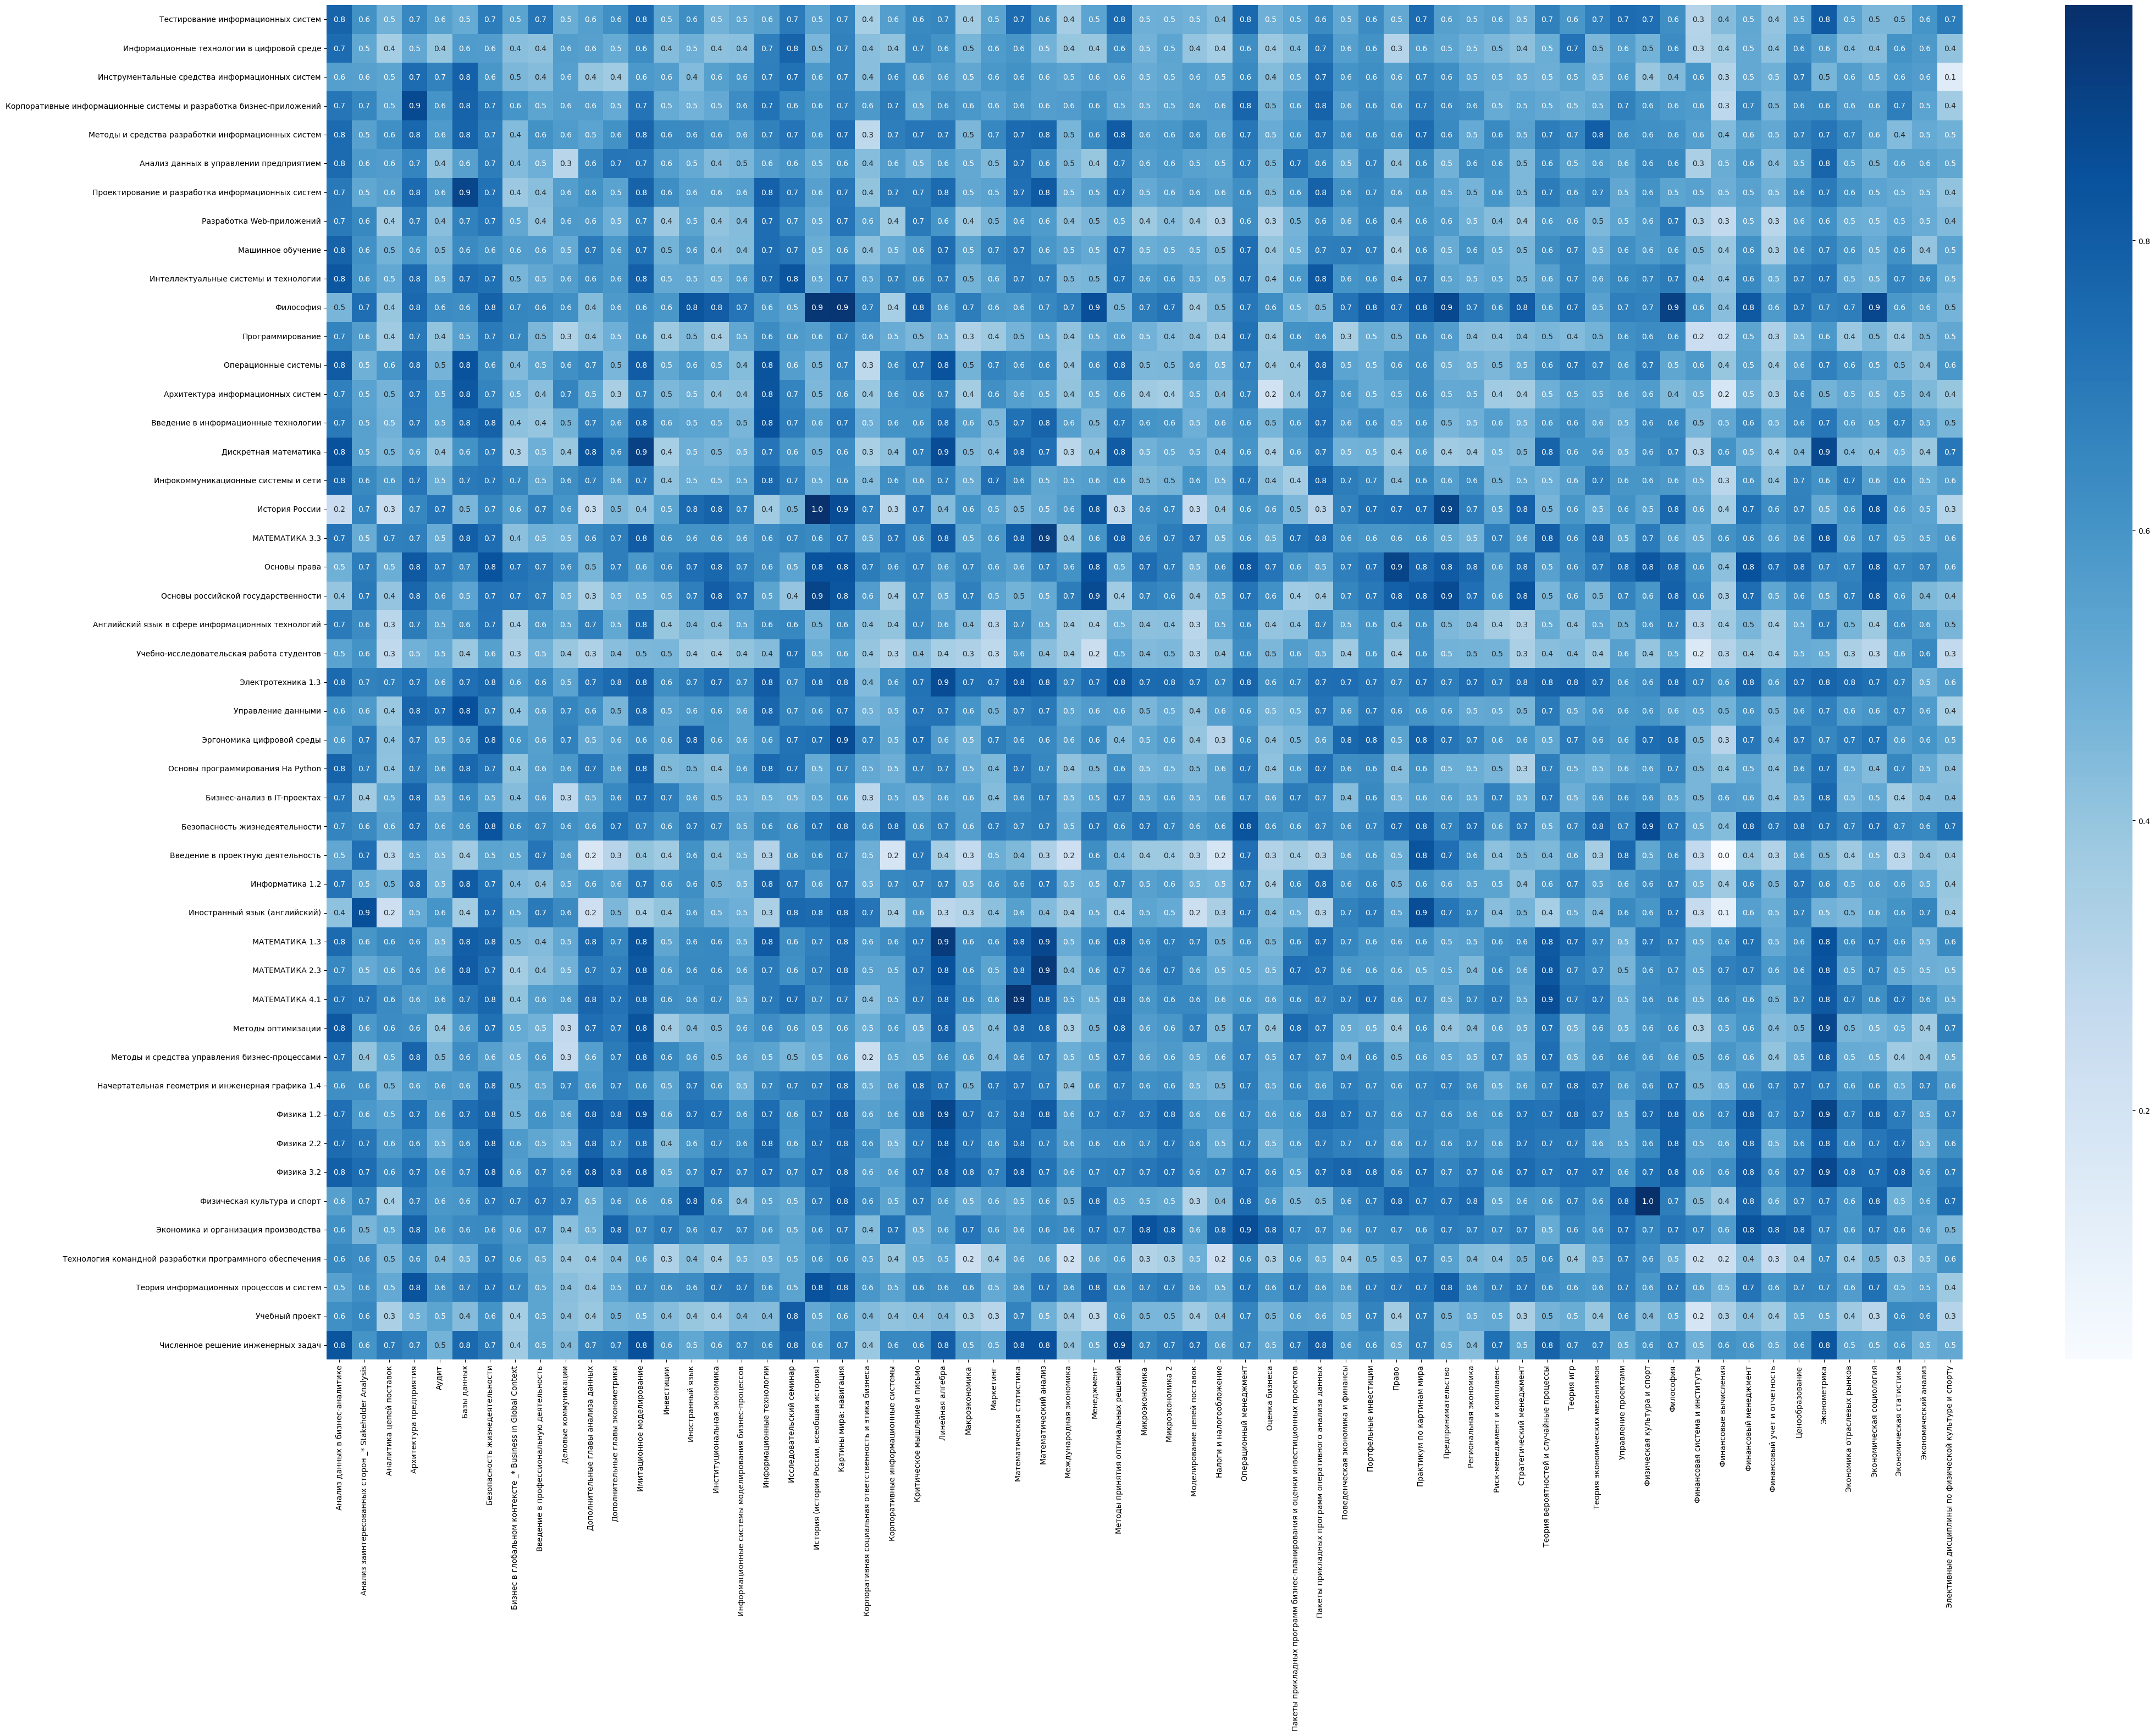

In [91]:
plt.figure(figsize = (48,32))
sns.heatmap(dataframe_doc2vec_oop_heat, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"